# 3.15.x Final Assignment

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.xlsx`
- `startup_funding2020.xlsx`
- `startup_funding2021.xlsx`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import regex as re

In [2]:
fnd = pd.DataFrame([])
datasets = os.listdir('data')
for ds in datasets:
    if re.match('startup_funding',ds):       
        tmp_df = pd.read_excel('data/'+ds)
        tmp_df['Year'] = ds[15:19]
        fnd = pd.concat([fnd, tmp_df])
print('The dataframe has',fnd.shape[0],'rows and',fnd.shape[1],'columns.')

The dataframe has 2343 rows and 10 columns.


2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [3]:
#DATASET CLEANING
fnd[fnd.Founded=='-']=0
fnd['Amount($)'] = fnd['Amount($)'].replace("\,","",regex=True)
fnd['Amount($)'] = fnd['Amount($)'].replace("\$","",regex=True)
fnd['Amount($)'] = fnd['Amount($)'].replace("(?i)(undisclosed)","",regex=True)
fnd['Founded'] = fnd['Founded'].fillna(0)
fnd['Year'] = fnd['Year'].astype('int64')
fnd['Founded'] = fnd['Founded'].astype('int64')
fnd['Amount($)'] = pd.to_numeric(fnd['Amount($)'])

In [4]:
#fnd['Year'] = pd.to_numeric(fnd['Year'])

In [5]:
tot_funds = fnd['Amount($)'].sum().round().astype('int64')
print('The total amount of funds given in the three years is: $',tot_funds)

The total amount of funds given in the three years is: $ 271544633856


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [6]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(5)

,Investor,size
696,Inflection Point Ventures,36
1623,Venture Catalysts,32
993,Mumbai Angels Network,17
163,Angel investors,15
1591,Undisclosed,13


In [7]:
top_inv_2020 = fnd[fnd['Year']==2020].groupby('Investor', as_index=False).size().sort_values('size', ascending=False)
top_inv_2020['ranking'] = top_inv_2020['size'].rank(method='dense', ascending=False).astype('int64')
ipv_rank = top_inv_2020[top_inv_2020['Investor']=='Inflection Point Ventures']['ranking']
print('The investor Inflection Point Ventures ranked at position',ipv_rank.iloc[0],'in terms of most Company/Brand funded in 2020.')

The investor Inflection Point Ventures ranked at position 3 in terms of most Company/Brand funded in 2020.


In [8]:
#check vari
#_2020 = pd.read_excel('data/startup_funding2020.xlsx')
#_2020.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(5)

4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [9]:
sps = pd.read_excel('data/Software Professionals Salary.xlsx')

In [10]:
#A
sps_loc = sps.groupby('Location')[['Rating','Salary']].agg(['mean']).reset_index()
sps_loc

,Location,Rating,Salary
,,mean,mean
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376
3,Jaipur,3.940741,629135.802469
4,Kerala,3.885185,553577.481481
5,Kolkata,4.024719,710925.573034
6,Madhya Pradesh,3.992258,677641.909677
7,Mumbai,3.881709,961180.368491
8,New Delhi,3.943415,658756.735632


In [11]:
#B
fnd_brand_count = fnd[fnd['Year']==2021].groupby('HeadQuarter',as_index=False)['Company/Brand'].count()
fnd_amount_sum = fnd[fnd['Year']==2021].groupby('HeadQuarter',as_index=False)['Amount($)'].sum()
fnd_loc = fnd_brand_count.merge(fnd_amount_sum[['HeadQuarter','Amount($)']], how='left', left_on='HeadQuarter', right_on='HeadQuarter')
fnd_loc

,HeadQuarter,Company/Brand,Amount($)
0,Ahmadabad,6,4.300000e+06
1,Ahmedabad,11,1.981550e+08
2,Ambernath,1,0.000000e+00
3,Andheri,1,0.000000e+00
4,Bangalore,425,1.432742e+10
...,...,...,...
64,The Nilgiris,1,2.000000e+05
65,Thiruvananthapuram,1,0.000000e+00
66,Trivandrum,1,3.000000e+05
67,Vadodara,1,1.000000e+07


In [12]:
#C - JOIN OF THE TWO DATAFRAMES
sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')

C:\Users\Sara\AppData\Local\Temp\ipykernel_596\75699283.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  sps_fnd_loc = sps_loc.merge(fnd_loc, how='inner', left_on='Location', right_on='HeadQuarter')


In [13]:
sps_fnd_loc.drop('HeadQuarter', axis=1, inplace=True)
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000
sps_fnd_loc.drop('Amount($)', axis=1, inplace=True)
sps_fnd_loc

,"(Location, )","(Rating, mean)","(Salary, mean)",Company/Brand,Amount($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00
5,Mumbai,3.881709,961180.368491,200,153830.30
6,New Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


In [14]:
#D
mapping = {sps_fnd_loc.columns[0]:'City',
           sps_fnd_loc.columns[1]:'Avg. Rating',
           sps_fnd_loc.columns[2]:'Avg. Salary',
           sps_fnd_loc.columns[3]:'Nr. Companies Funded',
           sps_fnd_loc.columns[4]:'Sum Funding ($MM)'
          }
sps_fnd_loc = sps_fnd_loc.rename(columns=mapping)

In [15]:
#Look at the City that received the highest Avg. Rating score by employees: what is the Nr. Companies Funded in that city?
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00
5,Mumbai,3.881709,961180.368491,200,153830.30
6,New Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


In [16]:
print('The number of companies funded in',sps_fnd_loc.sort_values('Avg. Rating').iloc[0][0],'is',sps_fnd_loc.sort_values('Avg. Rating').iloc[0][3],'.')

The number of companies funded in Mumbai is 200 .


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

<AxesSubplot:xlabel='Avg. Salary', ylabel='Sum Funding ($MM)'>

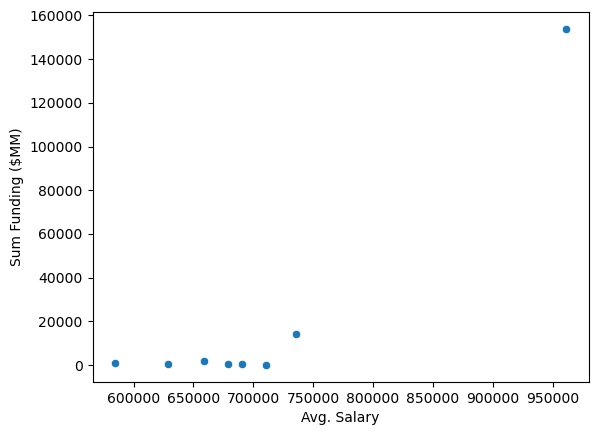

In [17]:
sns.scatterplot(x='Avg. Salary', y='Sum Funding ($MM)', data=sps_fnd_loc)

In [18]:
sps_fnd_loc[sps_fnd_loc['Avg. Salary'] == sps_fnd_loc['Avg. Salary'].max()]

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
5,Mumbai,3.881709,961180.368491,200,153830.3


In [19]:
sps_fnd_loc[sps_fnd_loc['Sum Funding ($MM)'] == sps_fnd_loc['Sum Funding ($MM)'].max()]

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
5,Mumbai,3.881709,961180.368491,200,153830.3


6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem. 
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation. 